<a href="https://colab.research.google.com/github/AndrewChien78/WaterLevel/blob/master/WaterLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
This is a Jupiter Notebook for work done on the River Water Level Prediction with Convolutional Neural Networks

The following code below was used to load the water level CSV files into Colab Python Notebook

# Setup Code 
## input data file etc

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving atimCreek2017-05-01.csv to atimCreek2017-05-01.csv
User uploaded file "atimCreek2017-05-01.csv" with length 7788 bytes


In [0]:
#Setup input_data_File
input_data_file = 'atimCreek2017-05-01.csv'

# Code to display Water Level

In [3]:
# This code loads the river water level data and displays it
# It is based on an example from Jason Brownlee of Machine Learning Mastery. This code provides 
# an example of time series decomposition
# https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
#
from pandas import read_csv
from matplotlib import pyplot
series = read_csv(input_data_file, header=0, parse_dates=[0], index_col=0, squeeze=True)
series.head()

Date.and.Time
2017-05-01 00:00:00    8.721
2017-05-01 00:05:00    8.721
2017-05-01 00:10:00    8.724
2017-05-01 00:15:00    8.723
2017-05-01 00:20:00    8.719
Name: Water.Level..m., dtype: float64

In [4]:
series.tail()

Date.and.Time
2017-05-01 23:35:00    8.713
2017-05-01 23:40:00    8.713
2017-05-01 23:45:00    8.714
2017-05-01 23:50:00    8.719
2017-05-01 23:55:00    8.715
Name: Water.Level..m., dtype: float64

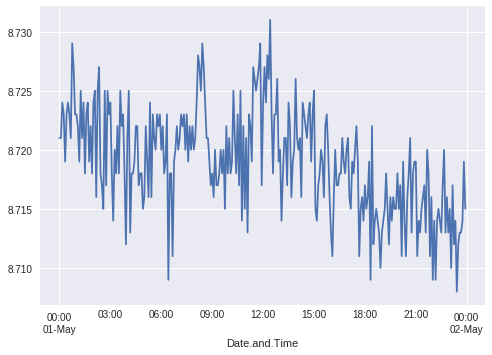

In [5]:
series.plot()
pyplot.show()

1 Feb 2019: Will try to learn how to use read_csv to import the data correctly into python. https://www.datacamp.com/community/tutorials/pandas-read-csv<br>
18 Feb 2019: I solved the problem by changing the R notebook script to write the csv file without the row index.
Will also break up the dataset into a Training Set and Test Set. The first 90% of time series will be used as the training set and the next 10% of the time series will be used as the test set. See link below for more info. <br> https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

Total Observations: 288
Training Observations: 259
Testing Observations: 29


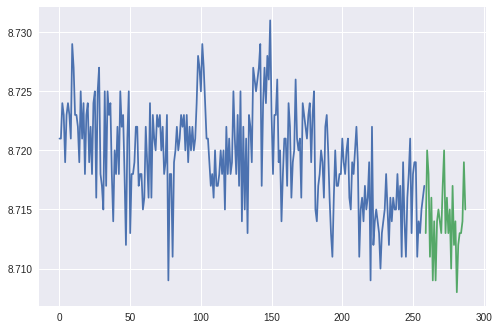

In [6]:
X = series.values
train_size = int(len(X) * 0.90)
train, test = X[0:train_size], X[train_size:len(X)]
print('Total Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

# Colaboratory GPU or TPU setup check
Run the code below to check if Colab has been setup correctly. If Colab notebook is setup to use GPU, the code below will return: "Found GPU at: /device:GPU:0"

https://www.kdnuggets.com/2018/02/essential-google-colaboratory-tips-tricks.html

In [7]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

# Theano Library - Colab Compatibility Test
Results show that Theano has been configured to run with Tensorflow in Colab

In [8]:
# This code is from Fabian Tence's post on Ankivil.com
# This code can be used to test if the installation of Theano has been carried out correctly.
# The post can be found at: 
# https://ankivil.com/installing-keras-theano-and-dependencies-on-windows-10/
#
# The expected result should be:
# [Elemwise{exp,no_inplace}(<TensorType(float64, vector)>)]
# Looping 1000 times took 13.727821 seconds
# Result is [1.23178032 1.61879341 1.52278065 ... 2.20771815 2.29967753 1.62323285]
# Used the cpu

from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[Elemwise{exp,no_inplace}(<TensorType(float64, vector)>)]
Looping 1000 times took 4.234721 seconds
Result is [1.23178032 1.61879341 1.52278065 ... 2.20771815 2.29967753 1.62323285]
Used the cpu


# Keras Library  - Colab Compatibility test
Results below show Keras can run on Colab with no major issues

In [9]:
# This code is from Fabian Tence's post on Ankivil.com
# This code can be used to test if the installation of Keras has been carried out correctly.
# The post can be found at: 
# https://ankivil.com/installing-keras-theano-and-dependencies-on-windows-10/
#

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

data_dim = 20
nb_classes = 4

model = Sequential()

# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, input_dim=data_dim, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, init='uniform'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',  
              metrics=["accuracy"])

# generate dummy training data
x_train = np.random.random((1000, data_dim))
y_train = np.random.random((1000, nb_classes))

# generate dummy test data
x_test = np.random.random((100, data_dim))
y_test = np.random.random((100, nb_classes))

model.fit(x_train, y_train,
          nb_epoch=20,
          batch_size=16)

score = model.evaluate(x_test, y_test, batch_size=16)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=20, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
1000/1000 [==============================] - 1s 623us/step - loss: 2.7637 - acc: 0.2450
Epoch 2/20
1000/1000 [==============================] - 0s 76us/step - loss: 2.7637 - acc: 0.2350
Epoch 3/20
1000/1000 [==============================] - 0s 76us/step - loss: 2.7636 - acc: 0.2570
Epoch 4/20
1000/1000 [==============================] - 0s 79us/step - loss: 2.7636 - acc: 0.2360
Epoch 5/20
1000/1000 [==============================] - 0s 77us/step - loss: 2.7633 - acc: 0.2510
Epoch 6/20
1000/1000 [==============================] - 0s 76us/step - loss: 2.7636 - acc: 0.2520
Epoch 7/20
1000/1000 [==============================] - 0s 75us/step - loss: 2.7635 - acc: 0.2510
Epoch 8/20
1000/1000 [==============================] - 0s 76us/step - loss: 2.7636 - acc: 0.2650
Epoch 9/20
1000/1000 [==============================] - 0s 86us/step - loss: 2.7636 - acc: 0.2620
Epoch 10/20
1000/1000 [==============================] - 0s 76us/step - loss: 2.7635 - acc: 0.2420
Epoch 11/20
1000/1

# Ready to predict 1 step of Water Level with Keras, Theano and Tensorflow

In [0]:
# This code tries to apply the Univariate Convolutional Neural Network Model for 
# forecasting river water levels of the Edmonton City in Alberta, Canada.
# 
# The data has been obtained from the URL below and processed for this purpose.
# https://data.edmonton.ca/dataset/Water-Levels-and-Flows/cnsu-iagr
# 
# This code uses examples from Jason Brownlee's "How to Develop Convolutional Neural Network Models for Time Series Forecasting"
# Modified By: Andrew Chien andrewkb.chien@gmail.com

from pandas import Series
from matplotlib import pyplot
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = train

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=1000, verbose=0)

# demonstrate prediction
x_input = array(test[0:27])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)